# CTD Data & Buoyancy Frequency Calculations - Winter

## Imports

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as pldates
import numpy as np
import scipy.signal as sig
import scipy.interpolate as interp
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook

## CTD Data
DFO La Perouse cruise, 2010-01. February 2nd - 16th. CTD file 2010-01-0010.ctd. Latitude 48.6505; longitude -126.66617.

In [3]:
CTD = np.genfromtxt('/Users/Kurtis/Documents/Python/Data/DFOLaPerouse/CTD/CTD_Data.csv',skip_header=1,delimiter=',')

In [4]:
P = -CTD[:,0]   # depth(pressure) [m]([dbar])
T = CTD[:,1]    # temperature [Celsius]
C = CTD[:,2]    # salinity, PSS-78 [PSU]

g = 9.81 # m/s**2

<IPython.core.display.Javascript object>


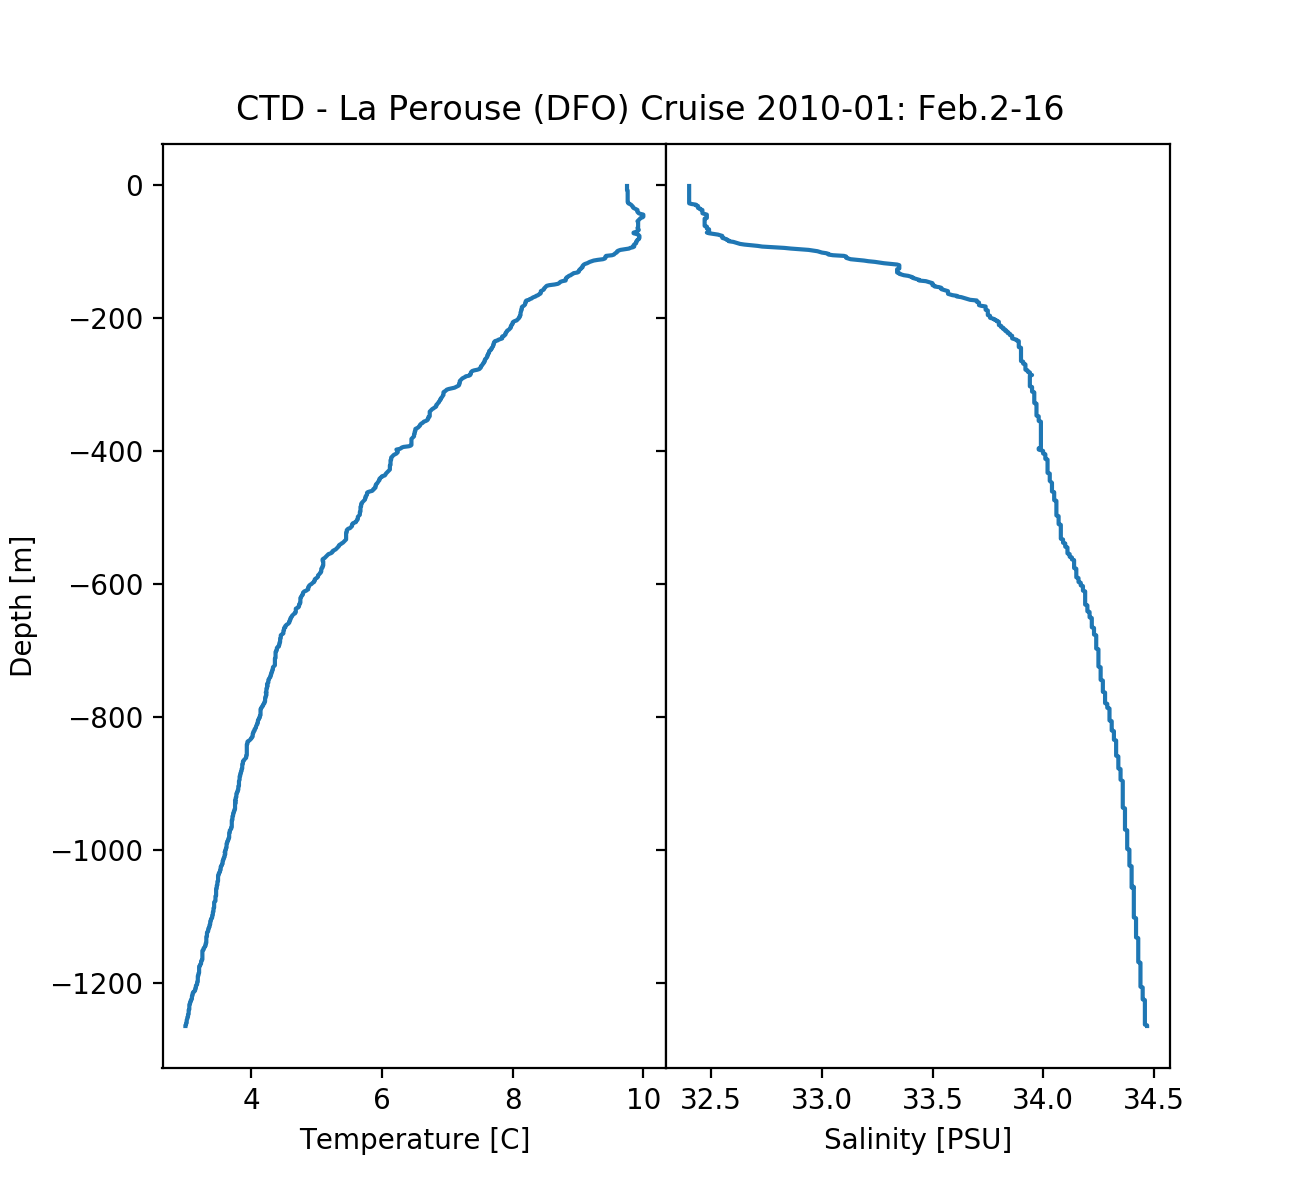

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6.5,6),sharey=True)
ax1.plot(T,P)
ax1.set_xlabel('Temperature [C]')
ax1.set_ylabel('Depth [m]')
ax2.plot(C,P)
ax2.set_xlabel('Salinity [PSU]')
fig.subplots_adjust(wspace = 0.0)
fig.text(0.5, 0.9, 'CTD - La Perouse (DFO) Cruise 2010-01: Feb.2-16', ha='center', fontsize=12)
plt.show()

## Buoyancy Frequency - Depth 138 metres

In [6]:
# buoyancy frequency, N, using phys.ocean.dal.ca/~kelley/seawater/density.html

# 137m
print('Depth',P[135],'m')
print('Temp',T[135],'C')
print('Salinity',C[135],'PSU')
print('---')
# in situ density @ 137m = 1026.50342 kg/m**3

# 138m
print('Depth',P[136],'m')
print('Temp',T[136],'C')
print('Salinity',C[136],'PSU')
print('---')
# in situ density @ 138m = 1026.51737 kg/m**3

# 139m
print('Depth',P[137],'m')
print('Temp',T[137],'C')
print('Salinity',C[137],'PSU')
print('---')
# in situ density @ 137m = 1026.53291 kg/m**3

dpdz138 = (1026.50342-1026.53291)/((-137)-(-139))     # density gradient, finite difference about desired depth
print('Density gradient',dpdz138,'kg/m**3 /m')
print('---')

N = np.sqrt( (-g/1026.51737) * (dpdz138) )
print('Buoyancy frequency',N,'Hz')

Depth -137.0 m
Temp 8.86 C
Salinity 33.39 PSU
---
Depth -138.0 m
Temp 8.85 C
Salinity 33.4 PSU
---
Depth -139.0 m
Temp 8.83 C
Salinity 33.41 PSU
---
Density gradient -0.01474499999994805 kg/m**3 /m
---
Buoyancy frequency 0.011870629243514156 Hz


## Buoyancy Frequency - Depth 330 metres

In [7]:
# buoyancy frequency, N, using phys.ocean.dal.ca/~kelley/seawater/density.html

# 329m
print('Depth',P[322],'m')
print('Temp',T[322],'C')
print('Salinity',C[322],'PSU')
print('---')
# in situ density @ 329m = 1028.13531 kg/m**3

# 330m
print('Depth',P[323],'m')
print('Temp',T[323],'C')
print('Salinity',C[323],'PSU')
print('---')
# in situ density @ 330m = 1028.14130 kg/m**3

# 331m
print('Depth',P[324],'m')
print('Temp',T[324],'C')
print('Salinity',C[324],'PSU')
print('---')
# in situ density @ 331m = 1028.14729 kg/m**3

dpdz330 = (1028.13531-1028.14729)/((-329)-(-331))     # density gradient, finite difference about desired depth
print('Density gradient',dpdz330,'kg/m**3 /m')
print('---')

N = np.sqrt( (-g/1028.14130) * (dpdz330) ) 
print('Buoyancy frequency',N,'Hz')

Depth -329.0 m
Temp 6.85 C
Salinity 33.97 PSU
---
Depth -330.0 m
Temp 6.84 C
Salinity 33.97 PSU
---
Depth -331.0 m
Temp 6.83 C
Salinity 33.97 PSU
---
Density gradient -0.00599000000011074 kg/m**3 /m
---
Buoyancy frequency 0.007559995072359457 Hz
